In [8]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-transactions-dataset/credit_card_transactions.csv


### 1. Quantidade de transações por ano
Em 2019 a quantidade de transações foi de 924,850.00 \
Em 2020 foi de 371,825.00

### 2. Quantidade de transações por gênero
Pelo gráfico gerado na análise, o público feminino comprou mais do que o masculino. A porcetagem de diferença foi de 20%


### 3. Qual o cenário das transações em 2020, de acordo com as análises?
De acordo com as análises, em 2020 teve queda nas transações de cartões de crédito. Ou seja, as pessoas usaram menos os cartões de crédito, isso pode significar que as pessoas pagaram pelas suas compras no dinheiro ou compraram pouco.

In [9]:
credit = pd.read_csv('/kaggle/input/credit-card-transactions-dataset/credit_card_transactions.csv')
credit.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


### 1. Quantidade de transações por ano

In [10]:
qtd_transacoes = float(len(credit))
print(qtd_transacoes)


1296675.0


In [11]:
formatted_qtd_transacoes = '{:,.2f}'.format(qtd_transacoes)

print(formatted_qtd_transacoes)

1,296,675.00


In [12]:
df = pd.DataFrame(credit, columns=['trans_date_trans_time'])
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['ano'] = df['trans_date_trans_time'].dt.year
transacoes_por_ano = df['ano'].value_counts().sort_index()
print(transacoes_por_ano)

ano
2019    924850
2020    371825
Name: count, dtype: int64


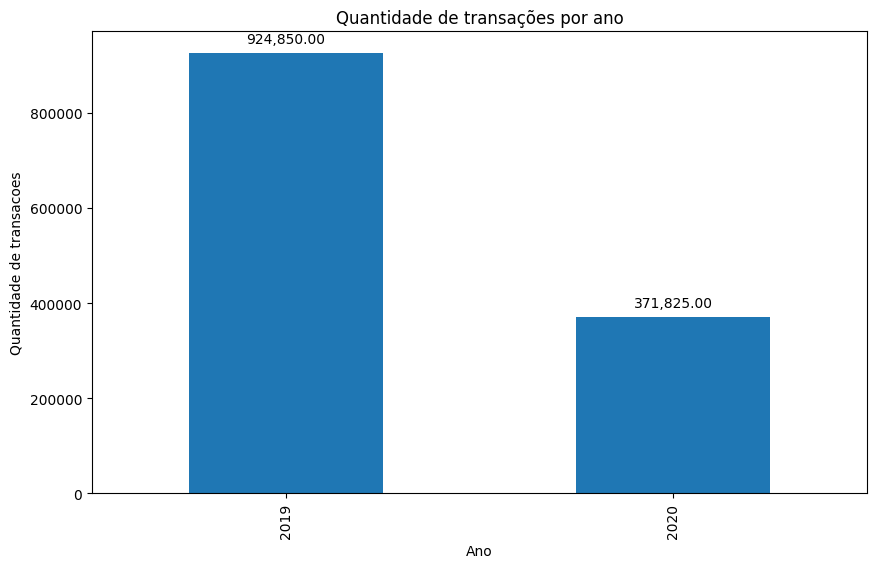

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
transacoes_por_ano.plot(kind='bar',figsize=(10,6))

plt.title('Quantidade de transações por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de transacoes')

for p in ax.patches:
    ax.annotate(
        format(p.get_height(),',.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',xytext=(0,10),textcoords='offset points'
    )

plt.show()

### 2. Quantidade de transações por gênero

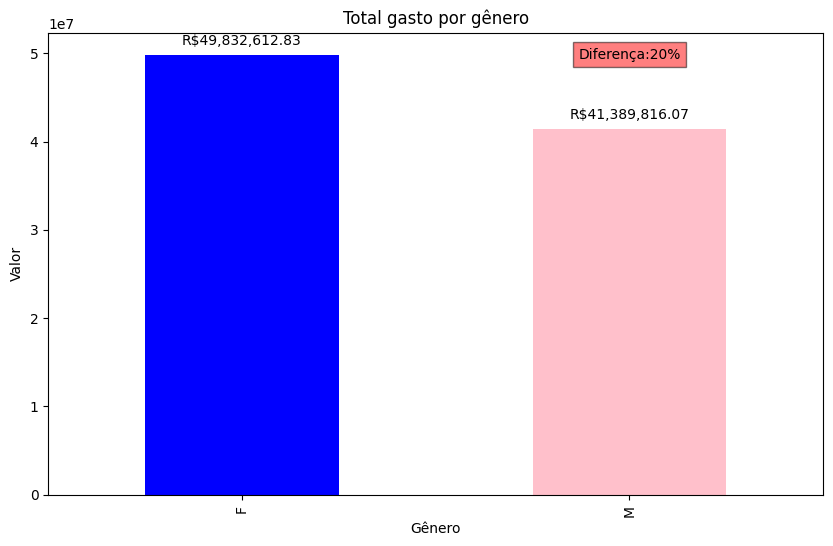

In [32]:
df1 = pd.DataFrame(credit)
gasto_por_genero = df1.groupby('gender')['amt'].sum()

gasto_m = gasto_por_genero['M']
gasto_f = gasto_por_genero['F']
porcentagem_diferenca = ((gasto_f - gasto_m) / gasto_m) * 100

fig, ax = plt.subplots(figsize=(10,6))
gasto_por_genero.plot(kind='bar',ax=ax, color=['blue', 'pink'])

plt.title('Total gasto por gênero')
plt.xlabel('Gênero')
plt.ylabel('Valor')

for p in ax.patches:
    ax.annotate(
        f'R${p.get_height():,.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',va='center', xytext=(0,10),textcoords='offset points'
    )
ax.annotate(
    f'Diferença:{porcentagem_diferenca:.0f}%',
    (1, max(gasto_m, gasto_f) + 50),
    ha='center', va='center', fontsize=10,
    bbox=dict(facecolor='red',alpha=0.5)
)    
    
plt.show()    

### 3. Perentual de variação entre os anos

In [50]:
df2 = pd.DataFrame(credit)
df2['trans_date_trans_time'] = pd.to_datetime(df2['trans_date_trans_time'])
df2['ano'] = df2['trans_date_trans_time'].dt.year
valor_transacoes_por_ano = df2.groupby('ano')['amt'].sum()

#cálculo da porcentagem
variacao_absoluta = valor_transacoes_por_ano.diff()
percentual_variacao = (variacao_absoluta / valor_transacoes_por_ano.shift(1)) * 100
percentual_variacao = percentual_variacao.round(0)
percentual_variacao = percentual_variacao.apply(lambda x:f'{int(x)}%' if pd.notnull(x) else 'N/A')

resultados = pd.DataFrame({
    'Valor Total(R$)': valor_transacoes_por_ano,
    'Variação Absoluta(R$)': variacao_absoluta,
    'Percentual de variação (%)': percentual_variacao
})

print(resultados)


      Valor Total(R$)  Variação Absoluta(R$) Percentual de variação (%)
ano                                                                    
2019      64984952.93                    NaN                        N/A
2020      26237475.97           -38747476.96                       -60%
